# Explainable deep-learning -- Visualizing deep neural networks

## [Author: Dr. Rahul Remanan](https://www.linkedin.com/in/rahulremanan)
### CEO and Chief Imagination Officer, [Moad Computer](https://moad.computer)

This is a skeletal frame work for building better explainable deep-learning.

In this notebook, using the [Kaggle Dogs vs Cats Redux, Kernels Edition dataset](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition).

## Import dependencies

In [1]:
import sys
import argparse
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import os
import time
import json
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.models import model_from_json

Using TensorFlow backend.


In [0]:
def generate_timestamp():
    timestring = time.strftime("%Y_%m_%d-%H_%M_%S")
    print ("Time stamp generated: "+timestring)
    return timestring

In [0]:
def is_valid_file(parser, arg):
    if not os.path.isfile(arg):
        parser.error("The file %s does not exist ..." % arg)
    else:
        return arg

In [0]:
def is_valid_dir(parser, arg):
    if not os.path.isdir(arg):
        parser.error("The folder %s does not exist ..." % arg)
    else:
        return arg

## Function to load the model for generating predictions

In [0]:
def load_prediction_model(args):
    try:
        print (args.config_file[0]) 
        with open(args.config_file[0]) as json_file:
              model_json = json_file.read()
        model = model_from_json(model_json)
    except:
          print ("Please specify a model configuration file ...")
          sys.exit(1)
    try:
          model.load_weights(args.weights_file[0])
          print ("Loaded model weights from: " + str(args.weights_file[0]))
    except:
          print ("Error loading model weights ...")
          sys.exit(1)
    try:
        print (args.labels_file[0])
        with open(args.labels_file[0]) as json_file:
            labels = json.load(json_file)
        print ("Loaded labels from: " + str(args.labels_file[0]))
    except:
        print ("No labels loaded ...")
        sys.exit(1)
    return model, labels

## Function to generate predictions

In [0]:
def predict(model, img, target_size):
  print ("Running prediction model on the image file ...")
  if img.size != target_size:
    img = img.resize(target_size)

  _x_ = image.img_to_array(img)
  _x_ = np.expand_dims(_x_, axis=0)
  _x_ = preprocess_input(_x_)
  preds = model.predict(_x_)
  probabilities = model.predict(_x_, batch_size=1).flatten()
  prediction = labels[np.argmax(probabilities)]
  return preds[0], prediction

## Function to plot prediction accuracy

In [0]:
def plot_preds(image, preds, labels, timestr):
  output_loc = args.output_dir[0]
  output_file_preds = os.path.join(output_loc+"//preds_out_"+timestr+".png")
  fig = plt.figure()
  plt.axis('on')
  labels = labels
  plt.barh([0, 1], preds, alpha=0.5)
  plt.yticks([0, 1], labels)
  plt.xlabel('Probability')
  plt.xlim(0,1.01)
  plt.tight_layout()
  fig.savefig(output_file_preds, dpi=fig.dpi)

## Initialize parameters for generating predictions

In [0]:
import types
args=types.SimpleNamespace()
args.config_file = ['./trained_cats_dogs.config']
args.weights_file = ['./trained_cats_dogs_epochs30_weights.model']
args.labels_file = ['./trained_labels.json']
args.output_dir = ['./']
args.image = ['./cat_01.jpg']
args.image_url = ['https://github.com/rahulremanan/python_tutorial/raw/master/Machine_Vision/02_Object_Prediction/test_images/dog_01.jpg']

## Load the trained deep learning model and load model weights

In [9]:
model, labels = load_prediction_model(args)

./trained_cats_dogs.config
Instructions for updating:
Colocations handled automatically by placer.
Loaded model weights from: ./trained_cats_dogs_epochs30_weights.model
./trained_labels.json
Loaded labels from: ./trained_labels.json


## Visualizing the model architecture -- Inception version 3

In [0]:
from keras.utils import plot_model 
import pydot 
import graphviz # apt-get install -y graphviz libgraphviz-dev && pip3 install pydot graphviz 
from IPython.display import SVG 
from keras.utils.vis_utils import model_to_dot

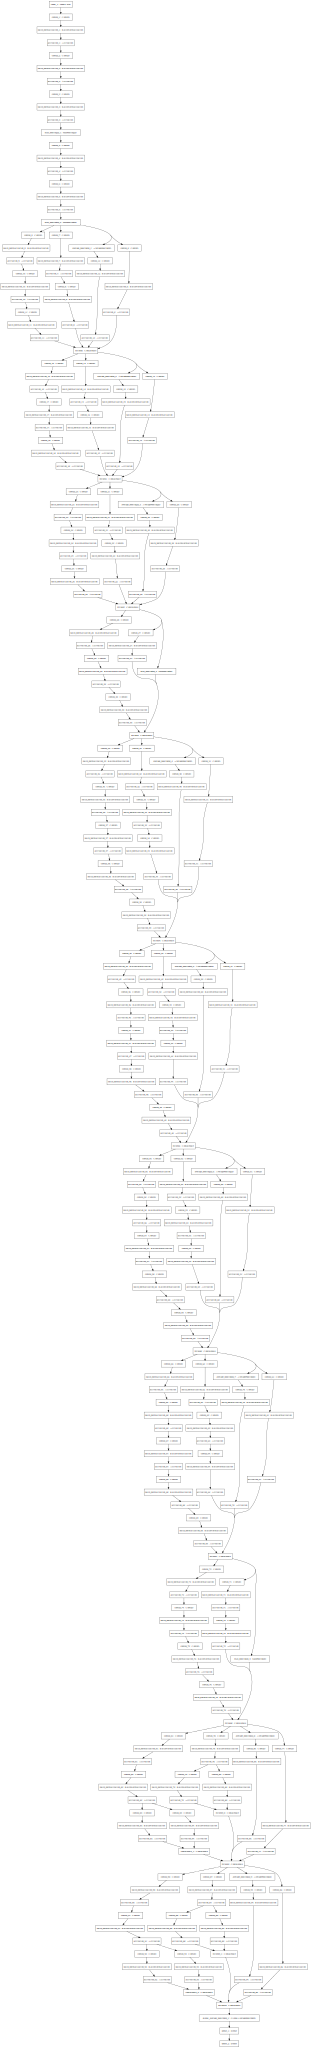

In [11]:
output_dir = './'
plot_model(model, to_file= output_dir + '/model_summary_plot.png') 
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## [Download model weights, configuration, classification labels](https://github.com/rahulremanan/python_tutorial/tree/master/Machine_Vision/02_Object_Prediction/model) [and example images](https://github.com/rahulremanan/python_tutorial/tree/master/Machine_Vision/02_Object_Prediction/test_images)

In [12]:
! wget https://raw.githubusercontent.com/rahulremanan/python_tutorial/master/Machine_Vision/02_Object_Prediction/test_images/cat_01.jpg -O cat_01.jpg
! wget https://raw.githubusercontent.com/rahulremanan/python_tutorial/master/Machine_Vision/02_Object_Prediction/model/trained_cats_dogs.config -O trained_cats_dogs.config
! wget https://raw.githubusercontent.com/rahulremanan/python_tutorial/master/Machine_Vision/02_Object_Prediction/model/trained_labels.json -O trained_labels.json
! wget https://media.githubusercontent.com/media/rahulremanan/python_tutorial/master/Machine_Vision/02_Object_Prediction/model/trained_cats_dogs_epochs30_weights.model -O trained_cats_dogs_epochs30_weights.model

--2019-02-28 18:09:33--  https://raw.githubusercontent.com/rahulremanan/python_tutorial/master/Machine_Vision/02_Object_Prediction/test_images/cat_01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140388 (137K) [image/jpeg]
Saving to: ‘cat_01.jpg’

cat_01.jpg          100%[===================>] 137.10K  --.-KB/s    in 0.02s   

2019-02-28 18:09:33 (6.10 MB/s) - ‘cat_01.jpg’ saved [140388/140388]

--2019-02-28 18:09:33--  https://raw.githubusercontent.com/rahulremanan/python_tutorial/master/Machine_Vision/02_Object_Prediction/model/trained_cats_dogs.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443.

## Specify input size for the image to generate predictions

In [0]:
target_size = (299, 299) 

## Run predictions -- Test image 1

### Visualize input image

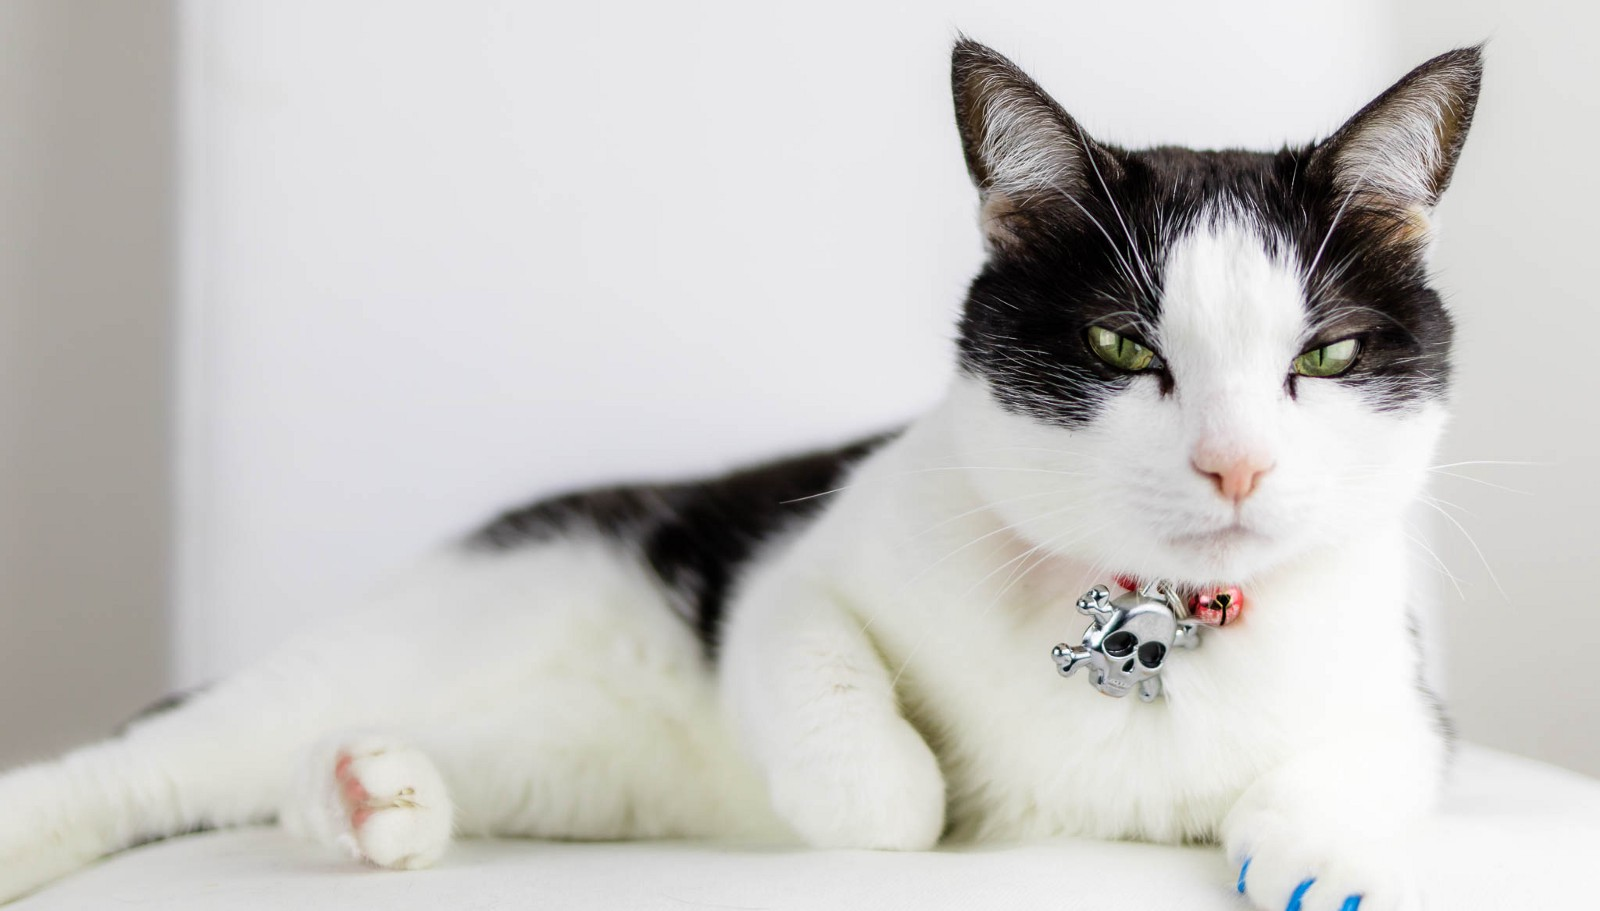

In [14]:
from IPython.display import Image as PyImage
from IPython.core.display import HTML 
PyImage(args.image[0])

## Generating predictions, plotting classification accuracy -- Test image 1

In [15]:
if args.image is not None:
    img = Image.open(args.image[0])
    preds = predict(model, img, target_size)
    print (preds[1] + "\t" + "\t".join(map(lambda x: "%.2f" % x, preds[0])))
    print (str(preds[1]))
    timestr = generate_timestamp()
    plot_preds(img, preds[0], labels, timestr)

Running prediction model on the image file ...
cats	0.74	0.26
cats
Time stamp generated: 2019_02_28-18_09_44


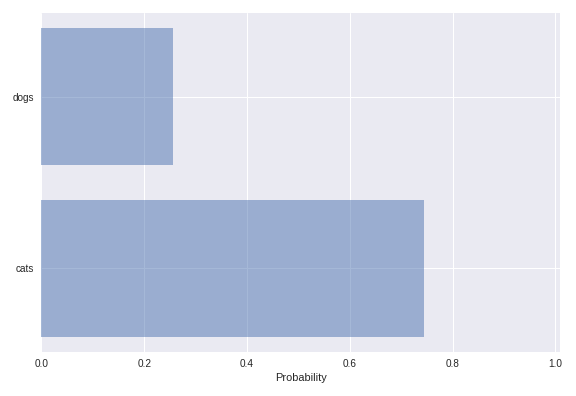

In [16]:
image_path_pred1 = os.path.join('./preds_out_'+timestr+'.png')
PyImage(image_path_pred1)

In [17]:
PyImage(url = args.image_url[0])

In [18]:
if args.image_url is not None:
    response = requests.get(args.image_url[0])
    img = Image.open(BytesIO(response.content))
    preds = predict(model, img, target_size)
    print (preds[1] + "\t" + "\t".join(map(lambda x: "%.2f" % x, preds[0])))
    print (str(preds[1]))
    timestr = generate_timestamp()
    plot_preds(img, preds[0], labels, timestr)

Running prediction model on the image file ...
cats	0.57	0.43
cats
Time stamp generated: 2019_02_28-18_09_45


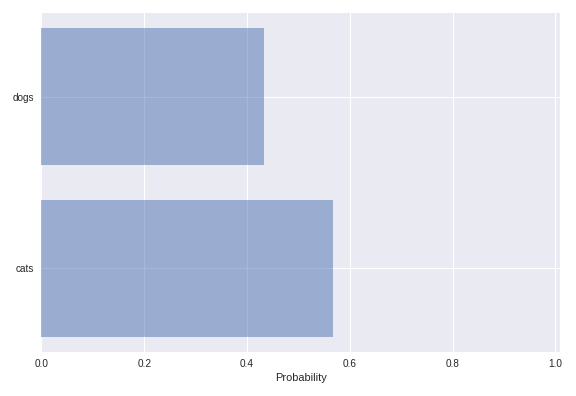

In [19]:
image_path_pred2 = os.path.join('./preds_out_'+timestr+'.png')
PyImage(image_path_pred2)

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.applications.inception_resnet_v2 as InceptionResNetV2
import tqdm

from keras import backend as K
from keras.models import Model
from keras.layers import UpSampling2D, Conv2D
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input

In [0]:
def class_activation_map(INPUT_IMG_FILE=None,
                         PRE_PROCESSOR=None,
                         LABEL_DECODER=None,
                         MODEL=None,
                         LABELS=None,
                         IM_WIDTH=299,
                         IM_HEIGHT=299,
                         CONV_LAYER='conv_7b',
                         URL_MODE=False,
                         FILE_MODE=False,
                         EVAL_STEPS=1,
                         HEATMAP_SHAPE=[8,8],
                         BENCHMARK=True):
  
  if INPUT_IMG_FILE == None:
    print ('No input file specified to generate predictions ...')
    return
  
  if URL_MODE:
    response = requests.get(INPUT_IMG_FILE)
    img = Image.open(BytesIO(response.content))
    img = img.resize((IM_WIDTH, IM_HEIGHT))
  elif FILE_MODE:
    img = INPUT_IMG_FILE
  else:
    img = image.load_img(INPUT_IMG_FILE, target_size=(IM_WIDTH, IM_HEIGHT))
    
  x = img
  
  if not FILE_MODE:
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    if PRE_PROCESSOR !=None:
      preprocess_input = PRE_PROCESSOR
      x = preprocess_input(x)
  
  model = MODEL
  if model == None:
    print ('No input model specified to generate predictions ...')
    return
  labels = LABELS
  
  heatmaps = []
  heatmap_sum = np.empty(HEATMAP_SHAPE, float)
  
  last_conv_layer = model.get_layer(CONV_LAYER)  
  feature_size = tensor_featureSizeExtractor(last_conv_layer)
  
  model_input = model.input
  model_output = model.output
  last_conv_layer_out = last_conv_layer.output
  
  iterate_input = []
  
  pred_labels = []
  out_labels = []
  
  probabilities = np.empty((0,len(labels)), float)
  
  for step in (range(EVAL_STEPS)):
    
    startTime = time.time()
    
    preds = model.predict(x, batch_size=1)
    
    preds_endTime = time.time()
    
    
    probability = preds.flatten()
    

    probabilities = np.append(probabilities, 
                              np.array([probability]), 
                              axis=0)
    
    if labels !=None:
      pred_label = labels[np.argmax(probability)]
      pred_labels.append(pred_label)
      out_labels.append(pred_label)
      print('PREDICTION: {}'.format(pred_label))
      print('ACCURACY: {}'.format(preds[0]))
      del pred_label
    elif LABEL_DECODER !=None:
      pred_label = pd.DataFrame(LABEL_DECODER(preds, top=3)[0],columns=['col1','category','probability']).iloc[:,1:]
      pred_labels.append(pred_label.loc[0,'category'])
      out_labels.append(pred_label.loc[0,'category'])
      print('PREDICTION:',pred_label.loc[0,'category'])
      del pred_label
    else:
      print ('No labels will be generated ...')
      
    pred_labels = set(pred_labels)
    pred_labels = list(pred_labels)
  
    argmax = np.argmax(probability)
    
    heatmap_startTime = time.time()
  
    output = model_output[:, argmax]
    
    model_endTime = time.time()  
  
    grads = K.gradients(output, 
                        last_conv_layer_out)[0]
    pooled_grads = K.mean(grads, 
                          axis=(0, 1, 2))
      
    iterate = K.function([model_input], [pooled_grads,
                                         last_conv_layer_out[0]])
    
    pooled_grads_value, conv_layer_output_value = iterate([x])
    
    grad_endTime = time.time()
    
    for i in range(feature_size):
      conv_layer_output_value[:,:,i] *= pooled_grads_value[i]
      
    iter_endTime = time.time()
    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    heatmap_endTime = time.time()  
    
    try:
      heatmap_sum = np.add(heatmap_sum, heatmap)
      heatmaps.append(heatmap)
      if EVAL_STEPS >1:
        del probability
        del heatmap
        del output
        del grads
        del pooled_grads
        del iterate
        del pooled_grads_value
        del conv_layer_output_value
    except:
      print ('Failed updating heatmaps ...')
    
    endTime = time.time()
    
    predsTime = preds_endTime - startTime
    gradsTime = grad_endTime - model_endTime
    iterTime = iter_endTime - grad_endTime
    heatmapTime = heatmap_endTime - heatmap_startTime
    executionTime = endTime - startTime
    model_outputTime = model_endTime - heatmap_startTime
    
    if BENCHMARK:
      print ('Heatmap generation time: {} seconds ...'. format(heatmapTime))
      print ('Gradient generation time: {} seconds ...'.format(gradsTime))
      print ('Iteration loop execution time: {} seconds ...'.format(iterTime))
      print ('Model output generation time: {} seconds'.format(model_outputTime))
      print ('Prediction generation time: {} seconds ...'.format(predsTime))
      print ('Completed processing {} out of {} steps in {} seconds ...'.format(int(step+1), int(EVAL_STEPS), float(executionTime)))
    
  if EVAL_STEPS >1:
    mean_heatmap = heatmap_sum/EVAL_STEPS
  else:
    mean_heatmap = heatmap
    
  mean = np.matrix.mean(np.asmatrix(probabilities), axis=0)
  stdev = np.matrix.std(np.asmatrix(probabilities), axis=0)
  
  accuracy = np.matrix.tolist(mean)[0][np.argmax(mean)]
  uncertainty = np.matrix.tolist(stdev)[0][np.argmax(mean)]
  
  return [mean_heatmap, accuracy, uncertainty, pred_labels, heatmaps, out_labels, probabilities]

In [22]:
labels_json='./trained_labels.json'
with open(labels_json) as json_file:
  labels = json.load(json_file)
print (labels)

['cats', 'dogs']


In [0]:
PRE_PROCESSOR = preprocess_input
MODEL = model
INPUT_IMG_FILE = './cat_01.jpg'
LABELS= labels

In [0]:
%matplotlib inline

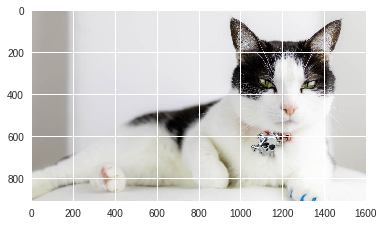

In [25]:
img=mpimg.imread(INPUT_IMG_FILE)
plt.imshow(img)

In [0]:
import tensorflow as tf

In [0]:
def tensor_featureSizeExtractor(last_conv_layer):
  if len(last_conv_layer.output.get_shape().as_list()) == 4:
    feature_size = last_conv_layer.output.get_shape().as_list()[3]
    return feature_size
  else:
    return 'Received tensor shape: {} instead of expected shape: 4'.format(len(last_conv_layer.output.get_shape().as_list()))

In [0]:
def heatmap_overlay(INPUT_IMG_FILE,
                    HEATMAP,
                    THRESHOLD=0.8):
  img = cv2.imread(INPUT_IMG_FILE)
  
  heatmap = cv2.resize(HEATMAP, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  hif = THRESHOLD
  superimposed_img = heatmap * hif + img
  return [superimposed_img, heatmap]

PREDICTION: cats
ACCURACY: [0.7435995 0.2564006]
Instructions for updating:
Use tf.cast instead.
Heatmap generation time: 1.948390245437622 seconds ...
Gradient generation time: 1.936607837677002 seconds ...
Iteration loop execution time: 0.007581949234008789 seconds ...
Model output generation time: 0.004037141799926758 seconds
Prediction generation time: 0.3460574150085449 seconds ...
Completed processing 1 out of 1 steps in 2.295518398284912 seconds ...


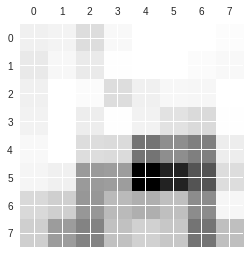

['cats']


In [29]:
output = class_activation_map(INPUT_IMG_FILE=INPUT_IMG_FILE,
                              PRE_PROCESSOR=PRE_PROCESSOR,
                              MODEL=MODEL,
                              LABELS=LABELS,
                              IM_WIDTH=299,
                              IM_HEIGHT=299,
                              CONV_LAYER='mixed10')
HEATMAP = output[0]

plt.matshow(HEATMAP)
plt.show()
print (output[3])

In [0]:
heatmap_output = heatmap_overlay(INPUT_IMG_FILE,
                                 HEATMAP,
                                 THRESHOLD=0.8)
superimposed_img = heatmap_output[0]

In [0]:
output_file = './class_activation_map.jpeg'
cv2.imwrite(output_file, superimposed_img)

img=mpimg.imread(output_file)

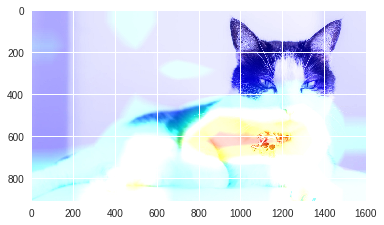

In [32]:
plt.imshow(img)